In [71]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [72]:
# constants
dir_training_images = '../../data/train/NORMAL'
img_size_xy = 224

In [73]:
def load_and_flatten_images(input_dir, img_size):
    image_data = []
    
    for filename in os.listdir(input_dir):
        file_path = os.path.join(input_dir, filename)
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                with Image.open(file_path) as img:
                    img = img.resize(img_size)
                    img_array = np.array(img).flatten()     # Flatten to 1D array
                    image_data.append(img_array)
            except Exception as e:
                print(f"Failed to process {filename}: {e}")
    
    return np.array(image_data)

In [74]:
new_size = (img_size_xy, img_size_xy)

# Run the function
np_arr_images = load_and_flatten_images(dir_training_images, new_size)

In [75]:
# Standardize the image data
scaler = StandardScaler()
images_std = scaler.fit_transform(np_arr_images)

# Apply PCA
pca = PCA()
pca.fit(images_std)

PCA()

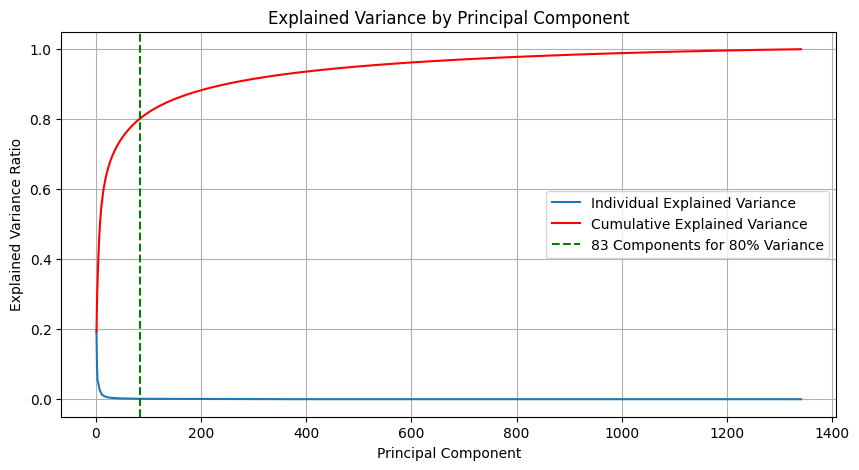

Number of components required to explain 80% of the variance: 83


In [76]:
# Explained variance and cumulative explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find the number of components for 80% explained variance
threshold = 0.80
num_components_80 = np.argmax(cumulative_variance >= threshold) + 1  # Add 1 because indexing starts at 0

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', label='Cumulative Explained Variance')

# Highlight the number of components for 80% variance
plt.axvline(x=num_components_80, color='green', linestyle='--', label=f'{num_components_80} Components for 80% Variance')

# Label the plot
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Output the number of components for 80% explained variance
print(f"Number of components required to explain 80% of the variance: {num_components_80}")

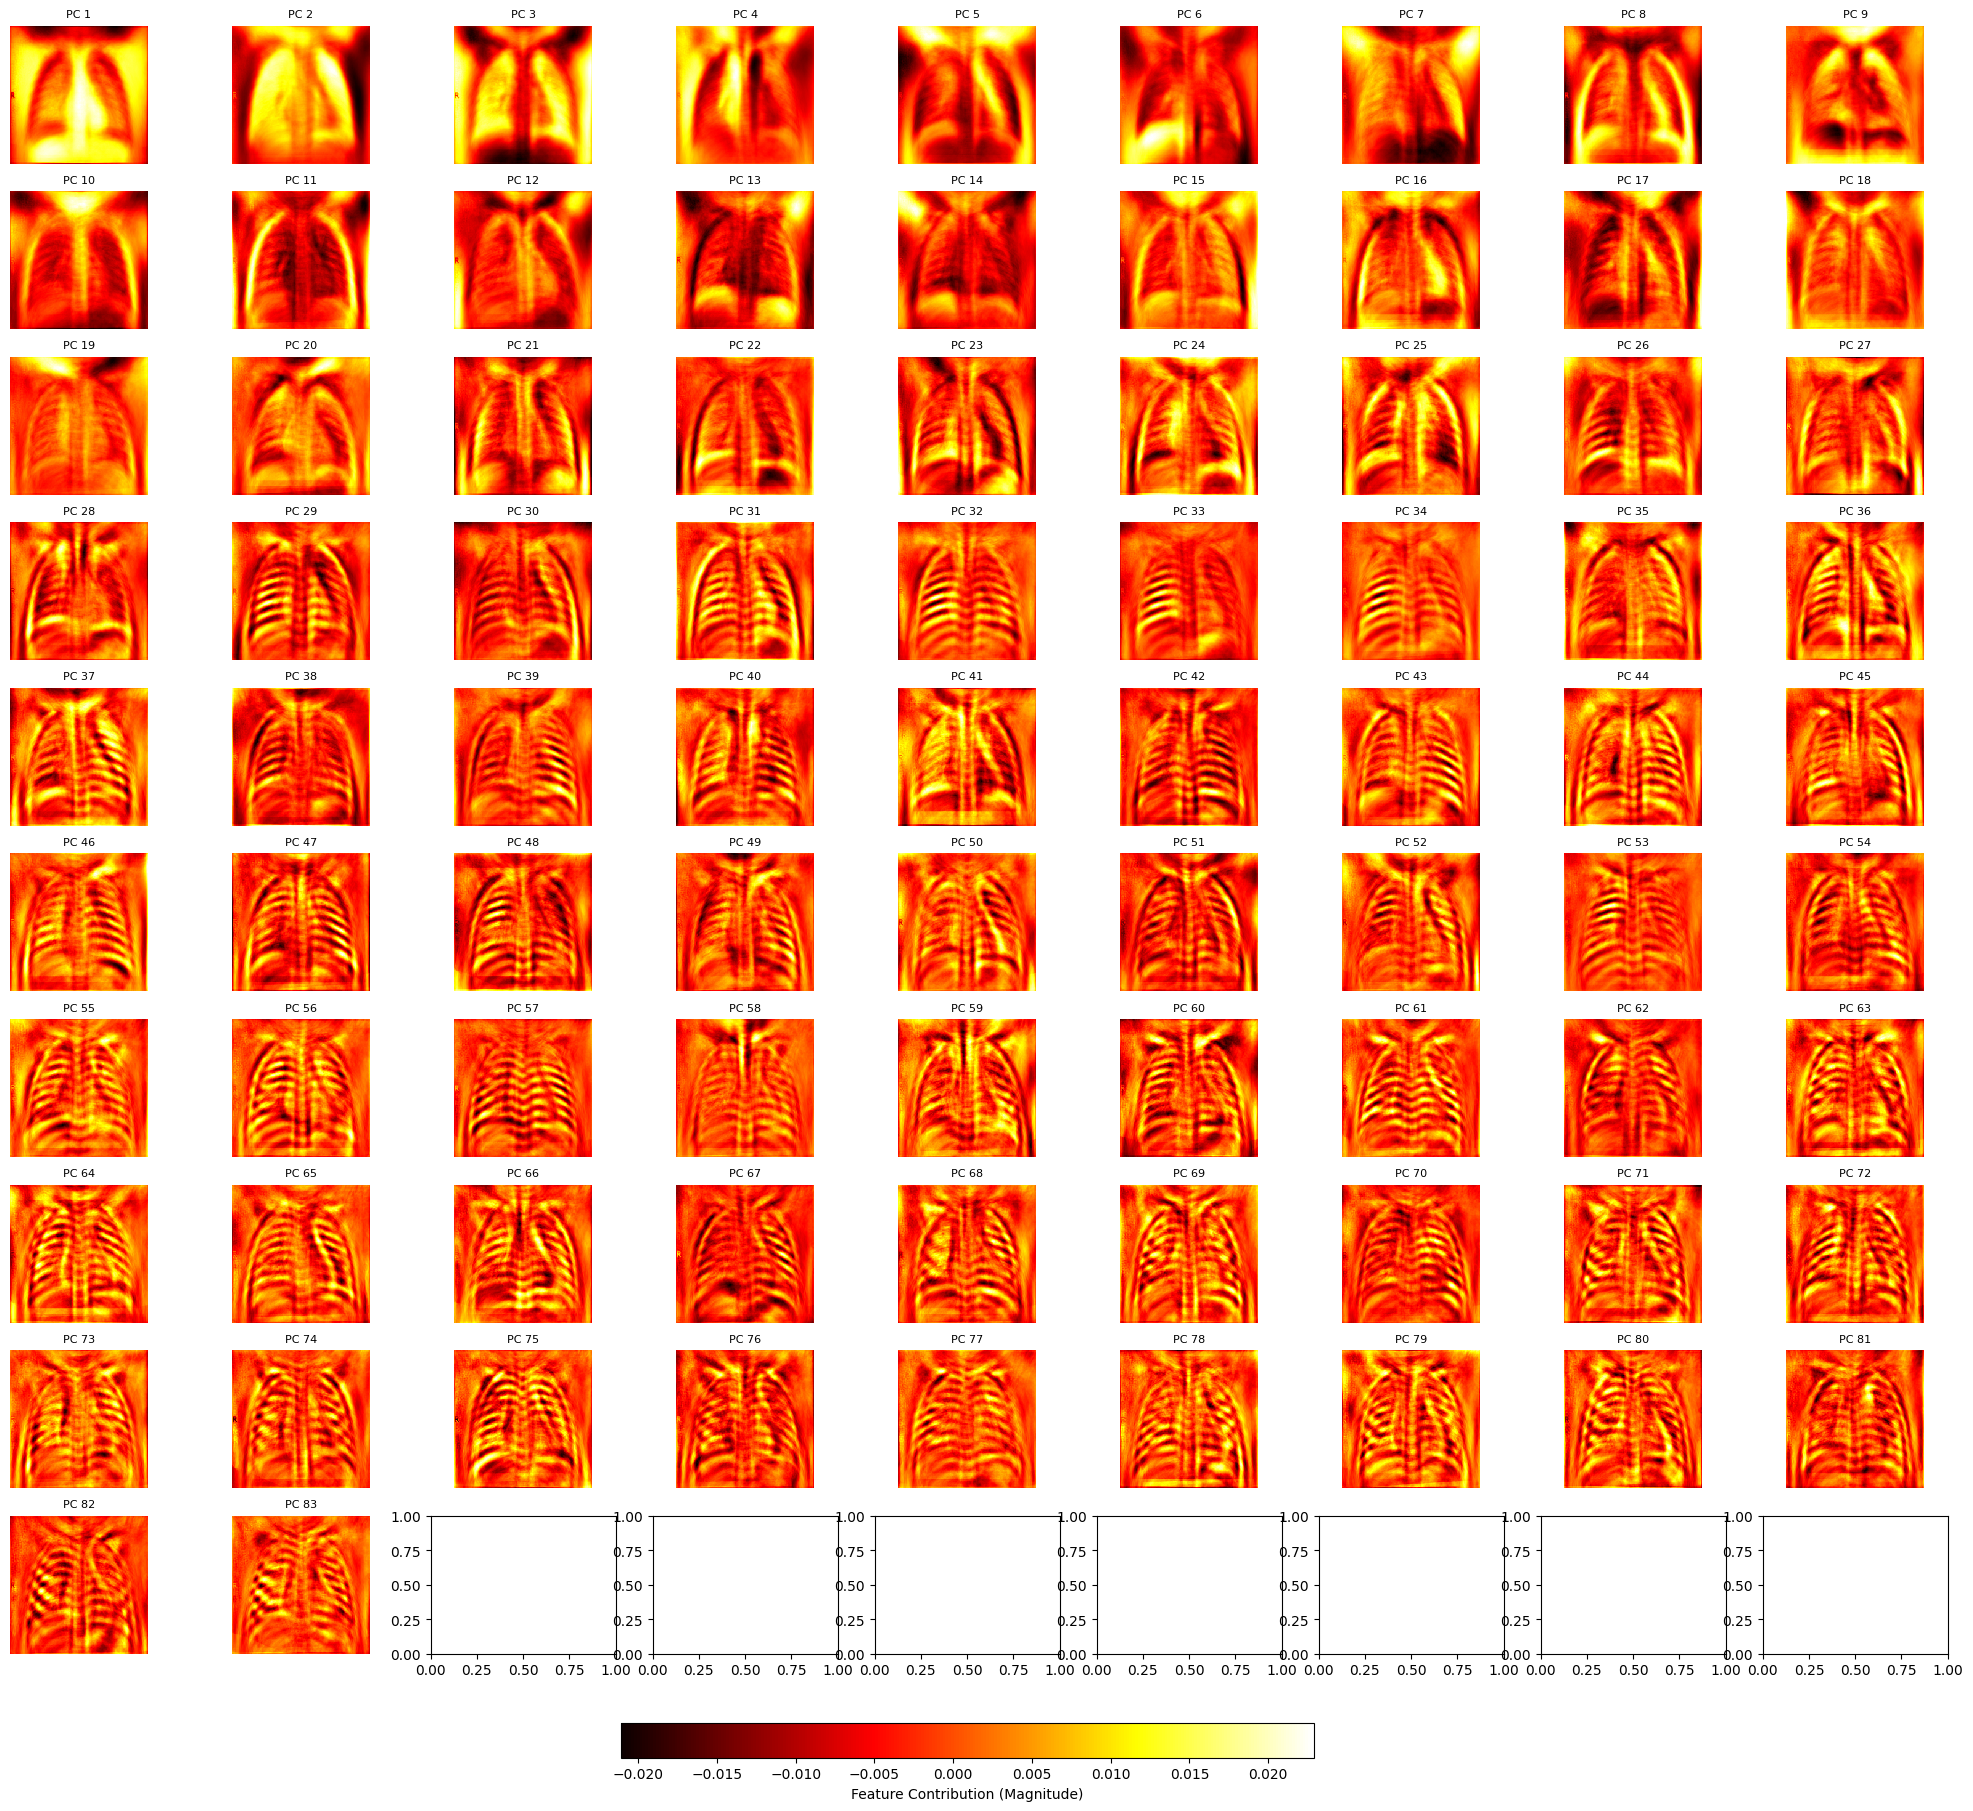

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'pca' is already fitted and you have the loadings (components)
loadings = pca.components_

# Get the image shape (assuming 224x224 images)
image_shape = (224, 224)

# Create a grid to display the 83 principal components
n_components = 83
n_rows = 10
n_cols = 9

# Set up the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 18))

# Loop over each principal component and display its contribution (loading)
for i in range(n_components):
    # Get the loadings for the i-th principal component
    pc_loadings = loadings[i]
    
    # Reshape the loadings into the image shape
    loadings_image = pc_loadings.reshape(image_shape)
    
    # Plot the loadings as a heatmap
    ax = axes[i // n_cols, i % n_cols]  # Select the correct subplot
    cax = ax.imshow(loadings_image, cmap='hot', interpolation='nearest')
    ax.axis('off')  # Turn off axis labels
    ax.set_title(f'PC {i+1}', fontsize=8)

# Adjust layout for better spacing (squeeze images together)
fig.tight_layout(pad=1.0)  # Reduce padding between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Reduce space between subplots

# Add a colorbar for the heatmap
fig.colorbar(cax, ax=axes, orientation='horizontal', fraction=0.02, pad=0.04, label='Feature Contribution (Magnitude)')

# Show the plot
plt.show()
